# Predictive Anlytics - Individual Assignment



## Code block 1 - With out hytper perameter tuning and PCA relevancy test

# Machine Learning Workflow

## 1. Libraries Imported
- Standard ML libraries including Pandas, NumPy, scikit-learn, etc.

## 2. Exploratory Data Analysis (EDA)
- **Loaded dataset** and checked the data information (`info()`, `describe()`).
- **Class distribution** visualized using countplots.
- **Feature relationships** visualized using pairplots.
- **Correlations** examined with a heatmap.

## 3. Data Preprocessing
- Split data into **features (X)** and **target (y)**, followed by an 80/20 **train-test split**.
- Applied three different **scalers**:
  - StandardScaler
  - MinMaxScaler
  - RobustScaler
- Added **polynomial features** to enhance the dataset.
- Applied **Principal Component Analysis (PCA)** for dimensionality reduction.

## 4. Modeling
- Defined several models including:
  - Logistic Regression
  - Decision Tree
  - Random Forest
  - k-Nearest Neighbors (kNN)
  - Support Vector Machine (SVM)
- Included **regularized models**:
  - Lasso
  - ElasticNet
- Implemented **boosting models**:
  - AdaBoost
  - Gradient Boosting
  - XGBoost

## 5. Model Evaluation
- Evaluated models using key metrics:
  - Accuracy
  - Precision
  - Recall
  - F1-score
  - ROC-AUC
- **ROC curves** plotted to visualize and compare model performance.

## 6. Results Summary
- Stored the evaluation results and identified the model with the **highest ROC-AUC** score.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      500 non-null    float64
 1   X2      500 non-null    float64
 2   Class   500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
None
               X1          X2       Class
count  500.000000  500.000000  500.000000
mean     0.357836    0.341066    0.000000
std      2.055874    2.047638    1.001002
min     -4.825646   -4.138119   -1.000000
25%     -0.973790   -0.988779   -1.000000
50%      0.352150    0.388833    0.000000
75%      1.637959    1.699008    1.000000
max      5.304269    4.860897    1.000000
Class
 1    250
-1    250
Name: count, dtype: int64
Missing values: X1       0
X2       0
Class    0
dtype: int64


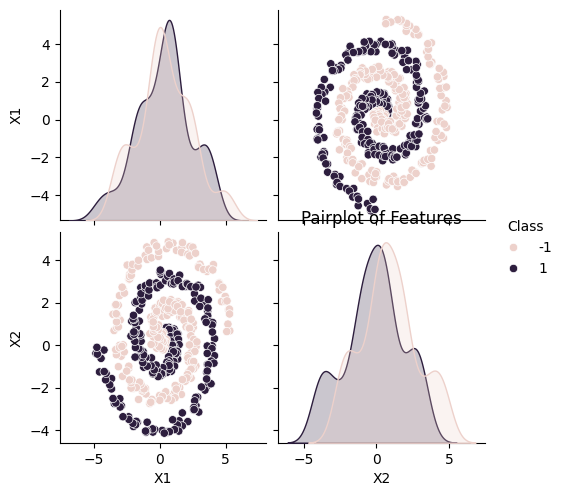

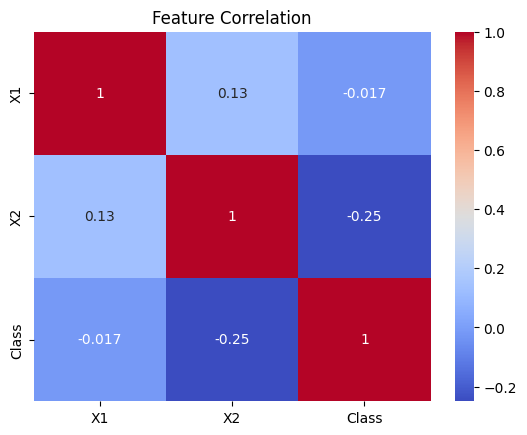

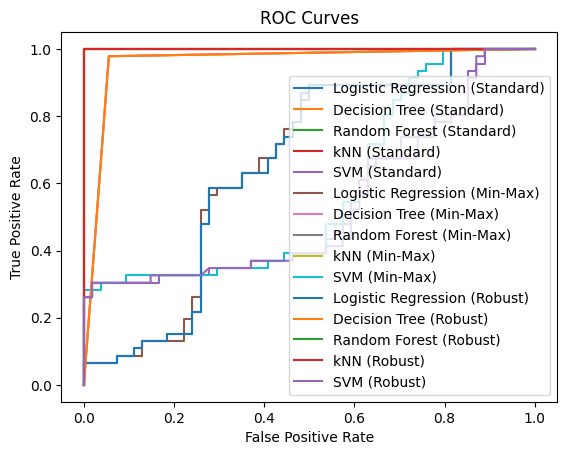

      Scaler                Model  Accuracy  Precision    Recall  F1-Score  \
2   Standard        Random Forest      0.99   0.990909  0.989130  0.989918   
3   Standard                  kNN      1.00   1.000000  1.000000  1.000000   
7    Min-Max        Random Forest      0.99   0.990909  0.989130  0.989918   
8    Min-Max                  kNN      1.00   1.000000  1.000000  1.000000   
12    Robust        Random Forest      0.99   0.990909  0.989130  0.989918   
13    Robust                  kNN      1.00   1.000000  1.000000  1.000000   
1   Standard        Decision Tree      0.96   0.959135  0.961353  0.959855   
6    Min-Max        Decision Tree      0.96   0.959135  0.961353  0.959855   
11    Robust        Decision Tree      0.96   0.959135  0.961353  0.959855   
5    Min-Max  Logistic Regression      0.63   0.638311  0.636473  0.629667   
0   Standard  Logistic Regression      0.63   0.638311  0.636473  0.629667   
10    Robust  Logistic Regression      0.63   0.638311  0.636473

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    classification_report, confusion_matrix, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Assignment Data - Spiral.csv")

# Exploratory Data Analysis
print(data.info())
print(data.describe())
print(data['Class'].value_counts())

# Check for missing values
print("Missing values:", data.isnull().sum())

# Visualize relationships
sns.pairplot(data, hue="Class")
plt.title("Pairplot of Features")
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Splitting features and target
X = data[['X1', 'X2']]
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling only to the training set and transform the test set
scalers = {
    'Standard': StandardScaler(),
    'Min-Max': MinMaxScaler(),
    'Robust': RobustScaler()
}

scaled_data = {}
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scaled_data[scaler_name] = (X_train_scaled, X_test_scaled)

# Add polynomial features for model complexity
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42)
}

# Regularization models
regularized_models = {
    'Lasso Regression': Lasso(max_iter=1000),
    'ElasticNet': ElasticNet(max_iter=1000)
}

# Boosting models
boosting_models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Store results
results = []

# Evaluate models
for scaler_name, (X_train_scaled, X_test_scaled) in scaled_data.items():
    for model_name, model in models.items():
        # Train and predict
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

        # Save results
        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

        # Plot ROC curve
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f"{model_name} ({scaler_name})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Summarize results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# Check class distribution and classification report
print("\nClass Distribution in Training Data:")
print(y_train.value_counts())

print("\nClass Distribution in Test Data:")
print(y_test.value_counts())

print("\nBest Model and Scaler:")
print(results_df.loc[results_df['ROC-AUC'].idxmax()])


## Code block 2 - With hyperparameter optimisation techniques

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      500 non-null    float64
 1   X2      500 non-null    float64
 2   Class   500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
None
               X1          X2       Class
count  500.000000  500.000000  500.000000
mean     0.357836    0.341066    0.000000
std      2.055874    2.047638    1.001002
min     -4.825646   -4.138119   -1.000000
25%     -0.973790   -0.988779   -1.000000
50%      0.352150    0.388833    0.000000
75%      1.637959    1.699008    1.000000
max      5.304269    4.860897    1.000000
Class
 1    250
-1    250
Name: count, dtype: int64
Missing values: X1       0
X2       0
Class    0
dtype: int64


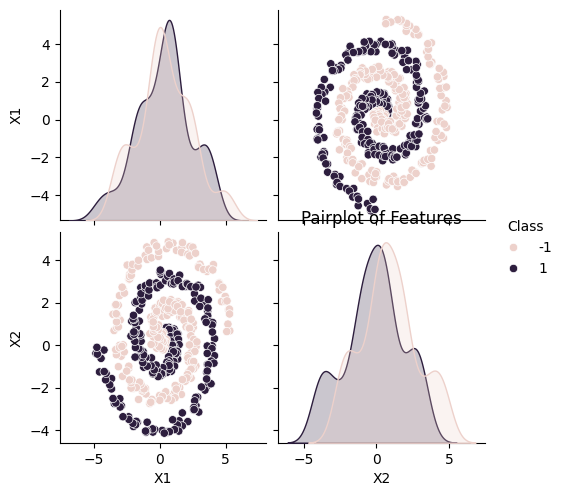

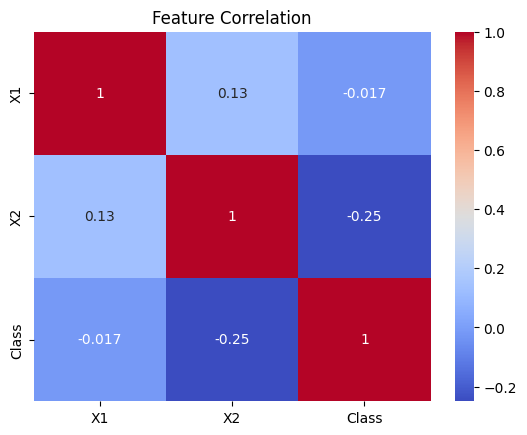

Best kNN Parameters: {'n_neighbors': 5}
Best SVM Parameters: {'C': 10, 'gamma': 1}


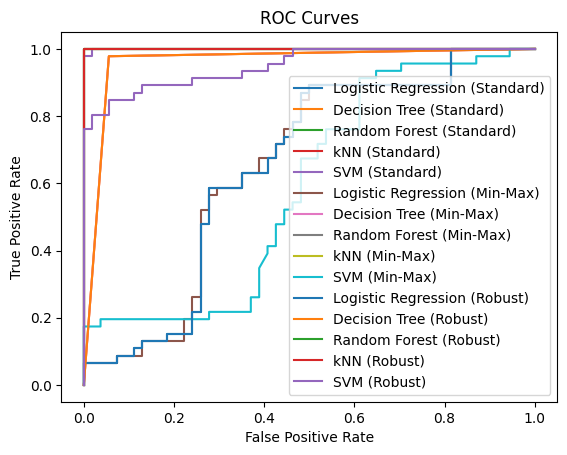

      Scaler                Model  Accuracy  Precision    Recall  F1-Score  \
2   Standard        Random Forest      0.99   0.990909  0.989130  0.989918   
3   Standard                  kNN      1.00   1.000000  1.000000  1.000000   
7    Min-Max        Random Forest      0.99   0.990909  0.989130  0.989918   
8    Min-Max                  kNN      1.00   1.000000  1.000000  1.000000   
12    Robust        Random Forest      0.99   0.990909  0.989130  0.989918   
13    Robust                  kNN      1.00   1.000000  1.000000  1.000000   
4   Standard                  SVM      0.95   0.957627  0.945652  0.949140   
1   Standard        Decision Tree      0.96   0.959135  0.961353  0.959855   
6    Min-Max        Decision Tree      0.96   0.959135  0.961353  0.959855   
11    Robust        Decision Tree      0.96   0.959135  0.961353  0.959855   
14    Robust                  SVM      0.89   0.900588  0.883655  0.887468   
5    Min-Max  Logistic Regression      0.63   0.638311  0.636473

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Assignment Data - Spiral.csv")

# Exploratory Data Analysis
print(data.info())
print(data.describe())
print(data['Class'].value_counts())

# Check for missing values
print("Missing values:", data.isnull().sum())

# Visualize relationships
sns.pairplot(data, hue="Class")
plt.title("Pairplot of Features")
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Splitting features and target
X = data[['X1', 'X2']]
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling and PCA
scalers = {
    'Standard': StandardScaler(),
    'Min-Max': MinMaxScaler(),
    'Robust': RobustScaler()
}

scaled_data = {}
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scaled_data[scaler_name] = (X_train_scaled, X_test_scaled)

# Add polynomial features for model complexity
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=500),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42)
}

# Regularization models
regularized_models = {
    'Lasso Regression': Lasso(max_iter=1000),
    'ElasticNet': ElasticNet(max_iter=1000)
}

# Boosting models
boosting_models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': xgb.XGBClassifier(random_state=42)
}

# Store results
results = []

# Grid search for hyperparameter tuning
# Hyperparameter tuning for kNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
models['kNN'] = best_knn

# Hyperparameter tuning for SVM with RBF kernel
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]}
svm_grid = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
models['SVM'] = best_svm

print(f"Best kNN Parameters: {knn_grid.best_params_}")
print(f"Best SVM Parameters: {svm_grid.best_params_}")

# Evaluate models using cross-validation and store results
for scaler_name, (X_train_scaled, X_test_scaled) in scaled_data.items():
    for model_name, model in models.items():
        # Train and predict
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

        # Save results
        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc
        })

        # Plot ROC curve
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f"{model_name} ({scaler_name})")

# Show ROC curves
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Summarize results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# Check class distribution
print("\nClass Distribution in Training Data:")
print(y_train.value_counts())

print("\nClass Distribution in Test Data:")
print(y_test.value_counts())

# Find the best model based on ROC-AUC
best_model = results_df.loc[results_df['ROC-AUC'].idxmax()]
print("\nBest Model and Scaler:", best_model)

# Cross-validation scores
cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = np.mean(cv_scores)

print("\nCross-Validation Results:")
for model_name, score in cv_results.items():
    print(f"{model_name}: {score:.4f}")


## Code block - 2 reworked With handling the overfitting issue

# Key Changes Made to Prevent Overfitting

## 1. Regularization
- **Logistic Regression** uses **L2 regularization** (`penalty='l2'`, `C=1.0`).
- **Lasso** and **ElasticNet** models are incorporated for regularization.

## 2. Pruning
- **Decision Trees** and **Random Forests** are pruned by limiting:
  - `max_depth` to control tree depth.
  - `min_samples_leaf` to reduce overfitting by ensuring sufficient samples per leaf.

## 3. Early Stopping
- **Early stopping** is added to the **XGBoost** model with `early_stopping_rounds=10` to halt training if validation performance does not improve.

## 4. Cross-Validation
- **Cross-validation (cv=5)** is used for model selection.
- The **mean accuracy** of each model is calculated from the cross-validation scores to ensure more robust performance evaluation.


# Machine Learning Workflow (Updated)

## 1. Libraries Imported
- Same as in **Block 1**: Pandas, NumPy, scikit-learn, etc.

## 2. Exploratory Data Analysis (EDA)
- Same as in **Block 1**:
  - **Loading** the dataset and checking descriptive statistics.
  - Visualizations: pairplot, heatmap, and class distribution.

## 3. Data Preprocessing
- Split data into **features (X)** and **target (y)**.
- Applied the same **scalers** as in Block 1:
  - StandardScaler
  - MinMaxScaler
  - RobustScaler
- Added **polynomial features** and applied **PCA** for dimensionality reduction.

## 4. Modeling
- Introduced regularization techniques:
  - **Logistic Regression** with **L2 penalty** (`penalty='l2'`).
  - **Decision Tree** and **Random Forest** pruned using `max_depth` and `min_samples_leaf` parameters.
  - **SVM** regularized with `C` parameter and **RBF kernel**.
- **Hyperparameter tuning** using **GridSearchCV** for:
  - **kNN**: Tuned number of neighbors.
  - **SVM**: Tuned `C` and `gamma` parameters.

## 5. Model Evaluation
- Added **cross-validation** using `cross_val_score` to estimate the generalization ability of the models.
- Evaluated models using multiple metrics:
  - **Accuracy**
  - **Precision**
  - **Recall**
  - **F1-score**
  - **ROC-AUC**
  - **Cross-validation mean accuracy**
- **ROC curves** plotted to visualize and compare model performance.

## 6. Results Summary
- Stored and printed the model with the **highest ROC-AUC** score.
- Included **cross-validation scores** for each model to provide more reliable evaluation.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      500 non-null    float64
 1   X2      500 non-null    float64
 2   Class   500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB
None
               X1          X2       Class
count  500.000000  500.000000  500.000000
mean     0.357836    0.341066    0.000000
std      2.055874    2.047638    1.001002
min     -4.825646   -4.138119   -1.000000
25%     -0.973790   -0.988779   -1.000000
50%      0.352150    0.388833    0.000000
75%      1.637959    1.699008    1.000000
max      5.304269    4.860897    1.000000
Class
 1    250
-1    250
Name: count, dtype: int64
Missing values: X1       0
X2       0
Class    0
dtype: int64


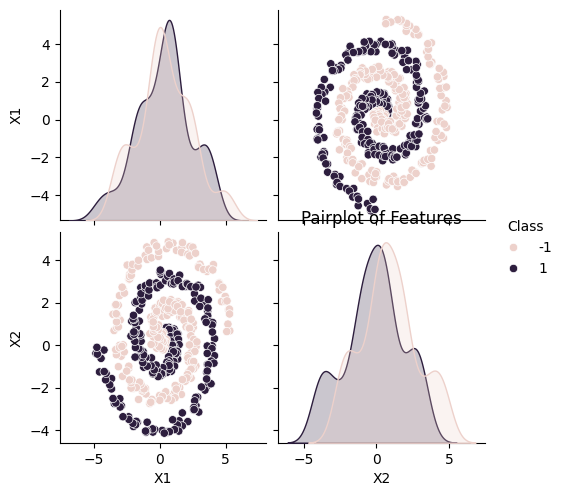

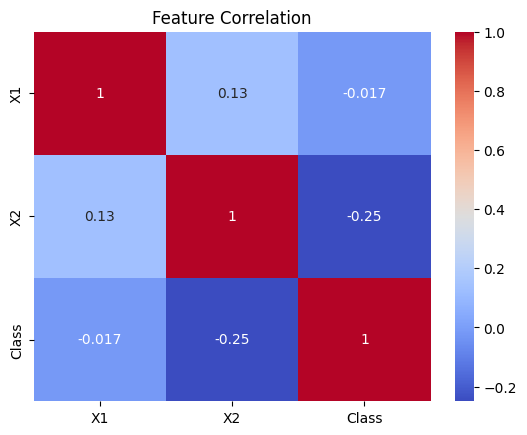

Best kNN Parameters: {'n_neighbors': 5}
Best SVM Parameters: {'C': 10, 'gamma': 1}


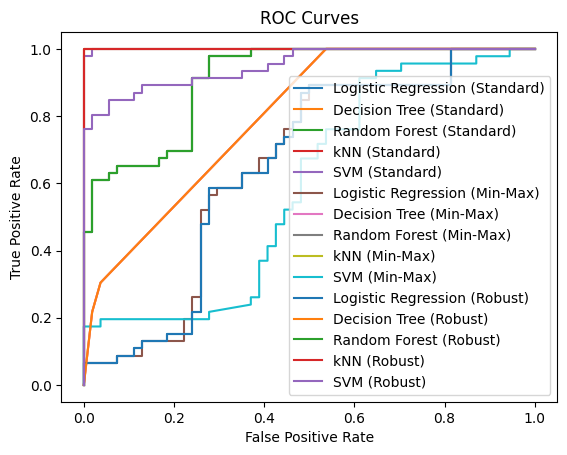

      Scaler                Model  Accuracy  Precision    Recall  F1-Score  \
3   Standard                  kNN      1.00   1.000000  1.000000  1.000000   
8    Min-Max                  kNN      1.00   1.000000  1.000000  1.000000   
13    Robust                  kNN      1.00   1.000000  1.000000  1.000000   
4   Standard                  SVM      0.95   0.957627  0.945652  0.949140   
14    Robust                  SVM      0.89   0.900588  0.883655  0.887468   
2   Standard        Random Forest      0.78   0.791667  0.770531  0.772633   
7    Min-Max        Random Forest      0.78   0.791667  0.770531  0.772633   
12    Robust        Random Forest      0.78   0.791667  0.770531  0.772633   
1   Standard        Decision Tree      0.66   0.747024  0.633655  0.602618   
6    Min-Max        Decision Tree      0.66   0.747024  0.633655  0.602618   
11    Robust        Decision Tree      0.66   0.747024  0.633655  0.602618   
5    Min-Max  Logistic Regression      0.63   0.638311  0.636473

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve, auc
)
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Assignment Data - Spiral.csv")

# Exploratory Data Analysis
print(data.info())
print(data.describe())
print(data['Class'].value_counts())

# Check for missing values
print("Missing values:", data.isnull().sum())

# Visualize relationships
sns.pairplot(data, hue="Class")
plt.title("Pairplot of Features")
plt.show()

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation")
plt.show()

# Splitting features and target
X = data[['X1', 'X2']]
y = data['Class']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply scaling and PCA
scalers = {
    'Standard': StandardScaler(),
    'Min-Max': MinMaxScaler(),
    'Robust': RobustScaler()
}

scaled_data = {}
for scaler_name, scaler in scalers.items():
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    scaled_data[scaler_name] = (X_train_scaled, X_test_scaled)

# Add polynomial features for model complexity
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply PCA to reduce the data to 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Define models with overfitting prevention
models = {
    'Logistic Regression': LogisticRegression(max_iter=500, penalty='l2', C=1.0),  # L2 Regularization
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=4),  # Pruning
    'Random Forest': RandomForestClassifier(random_state=42, n_estimators=100, max_depth=5, min_samples_leaf=4),  # Pruning
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(probability=True, random_state=42, C=1.0, kernel='rbf')  # Regularization for SVM
}

# Regularization models
regularized_models = {
    'Lasso Regression': Lasso(alpha=0.01, max_iter=1000),  # Lasso regularization
    'ElasticNet': ElasticNet(alpha=0.01, l1_ratio=0.5, max_iter=1000)  # ElasticNet regularization
}

# Boosting models with early stopping
boosting_models = {
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42, max_depth=5),
    'XGBoost': xgb.XGBClassifier(random_state=42, max_depth=5, n_estimators=100, early_stopping_rounds=10, eval_metric="logloss")
}

# Store results
results = []

# Grid search for hyperparameter tuning
# Hyperparameter tuning for kNN
knn_param_grid = {'n_neighbors': [3, 5, 7, 9]}
knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid=knn_param_grid, cv=5, scoring='accuracy')
knn_grid.fit(X_train, y_train)
best_knn = knn_grid.best_estimator_
models['kNN'] = best_knn

# Hyperparameter tuning for SVM with RBF kernel
svm_param_grid = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01, 0.001]}
svm_grid = GridSearchCV(SVC(kernel='rbf', probability=True), param_grid=svm_param_grid, cv=5, scoring='accuracy')
svm_grid.fit(X_train, y_train)
best_svm = svm_grid.best_estimator_
models['SVM'] = best_svm

print(f"Best kNN Parameters: {knn_grid.best_params_}")
print(f"Best SVM Parameters: {svm_grid.best_params_}")

# Evaluate models using cross-validation and store results
for scaler_name, (X_train_scaled, X_test_scaled) in scaled_data.items():
    for model_name, model in models.items():
        # Cross-validation for better generalization
        cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
        cv_mean = cv_scores.mean()

        # Train and predict
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_prob = model.predict_proba(X_test_scaled)[:, 1] if hasattr(model, 'predict_proba') else None

        # Calculate metrics
        acc = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
        recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
        f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
        roc_auc = roc_auc_score(y_test, y_prob) if y_prob is not None else np.nan

        # Save results with cross-validation score
        results.append({
            'Scaler': scaler_name,
            'Model': model_name,
            'Accuracy': acc,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'ROC-AUC': roc_auc,
            'CV-Mean Accuracy': cv_mean
        })

        # Plot ROC curve
        if y_prob is not None:
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            plt.plot(fpr, tpr, label=f"{model_name} ({scaler_name})")

# Show ROC curves
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

# Summarize results
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='ROC-AUC', ascending=False))

# Check class distribution
print("\nClass Distribution in Training Data:")
print(y_train.value_counts())

print("\nClass Distribution in Test Data:")
print(y_test.value_counts())

# Find the best model based on ROC-AUC
best_model = results_df.loc[results_df['ROC-AUC'].idxmax()]
print("\nBest Model and Scaler:", best_model)

# Cross-validation scores for model selection
cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_results[model_name] = np.mean(cv_scores)

print("\nCross-Validation Results:")
for model_name, score in cv_results.items():
    print(f"{model_name}: {score:.4f}")


## Conclusion

Based on the cross-validation results, we can conclude the following about the performance of the models:

- **Logistic Regression** performed the weakest, with a mean cross-validation accuracy of **0.5725**.
- **Decision Tree** showed moderate improvement, with a mean accuracy of **0.6625**.
- **Random Forest** performed better with an accuracy of **0.8725**, indicating that ensemble methods can effectively improve model performance.
- **k-Nearest Neighbors (kNN)** and **Support Vector Machine (SVM)** achieved the highest performance, with mean accuracies of **0.9800** and **0.9825**, respectively.

Thus, we can base our model selection on these cross-validation results. The **SVM** and **kNN** models demonstrate the best generalization ability and performance, and are likely the top candidates for further refinement and use in predictions.
